In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances


In [2]:
data_2d = pd.read_csv('data_2d.csv')

data_mnist = pd.read_csv('mnist.csv')

In [7]:
X_data_2d = data_2d.values

distortions_data_2d = []

for k in range(1, 11):
    kmeans_data_2d = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans_data_2d.fit(X_data_2d)
    distortions_data_2d.append(kmeans_data_2d.inertia_)


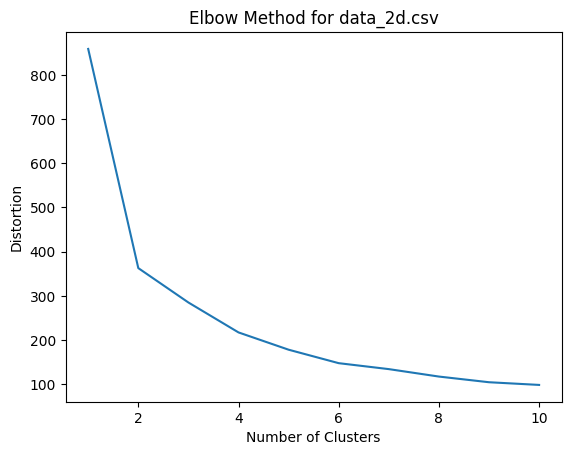

In [9]:
plt.plot(range(1, 11), distortions_data_2d)
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for data_2d.csv')
plt.show()

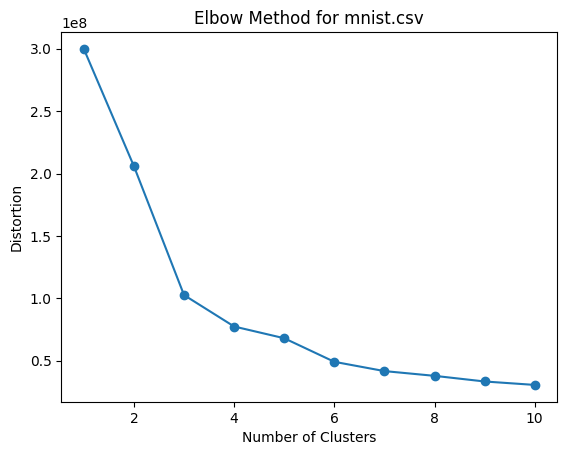

In [12]:
X_mnist = data_mnist.values


pca = PCA(n_components=2)
X_mnist_pca = pca.fit_transform(X_mnist)

distortions_mnist = []
max_clusters_mnist = 10

for k in range(1, 11):
    kmeans_mnist = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans_mnist.fit(X_mnist_pca)
    distortions_mnist.append(kmeans_mnist.inertia_)

plt.plot(range(1, 11), distortions_mnist, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for mnist.csv')
plt.show()

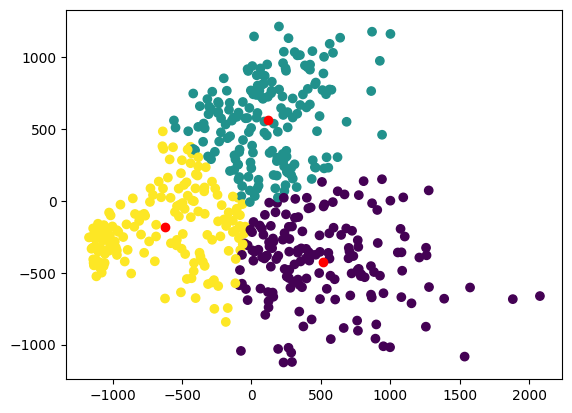

In [15]:
kmeans_mnist = KMeans(n_clusters=3, random_state=42, n_init="auto")
kmeans_mnist.fit(X_mnist_pca)
labels = kmeans_mnist.labels_

plt.scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1], c=labels)
plt.scatter(kmeans_mnist.cluster_centers_[:, 0], kmeans_mnist.cluster_centers_[:, 1], c='r')
plt.show()